In [99]:
import os
import pandas as pd
import numpy as np

In [100]:
file_path='/Users/micheletucci'
file_name='dati_seriale4_michi.txt'

folder_path=os.path.join(file_path,file_name)

#dati=np.loadtxt(folder_path)

# Funzioni per estrarre valori
def extract_force(line):
    if 'forceIs' in line:
        try:
            return float(line.split(':')[1].strip())
        except ValueError:
            pass
    return None

def extract_angle(line):
    if 'Angle' in line:
        try:
            return float(line.split(':')[1].strip())
        except ValueError:
            pass
    return None

# Lettura e parsing del file
try:
    with open(folder_path, 'r') as file:
        lines = file.readlines()  # Leggi tutte le righe

    # Estrai i valori
    force_values = [extract_force(line) for line in lines if extract_force(line) is not None]
    angle_values = [extract_angle(line) for line in lines if extract_angle(line) is not None]

    # Converti in array NumPy
    force_array = np.array(force_values)
    angle_array = np.array(angle_values)

    print("Valori di 'forceIs' estratti:")
    print(force_array)
    print("Valori di 'angle' estratti:")
    print(angle_array)
except Exception as e:
    print(f"Errore durante la lettura e il parsing del file: {e}")


Valori di 'forceIs' estratti:
[  4.92   5.03   5.13   4.71   4.92   5.13   4.87   4.35   4.4    4.14
   3.61   2.51   3.61   3.41   2.04   1.41   0.94  -0.26  -1.05  -2.15
  -2.57  -3.14  -3.77  -3.93  -4.56  -5.19  -5.34  -5.71  -5.87  -6.65
  -7.54  -7.91  -8.22  -8.54  -8.64  -8.38  -8.22  -7.91  -8.28  -8.96
  -9.32  -9.53  -9.12  -9.22  -9.38  -9.53  -9.22  -9.22  -9.27  -9.17
  -9.12  -9.12  -8.91  -8.91  -8.91  -8.85  -8.85  -9.12  -9.32  -9.12
  -8.64  -8.17  -8.12  -8.12  -8.07  -8.28  -8.8   -8.75  -8.49  -8.07
  -7.6   -7.33  -7.44  -6.34  -6.5   -6.71  -6.86  -6.6   -6.86  -6.91
  -7.7   -7.81  -7.54  -7.28  -7.33  -7.6   -8.01  -8.85  -8.8   -8.59
  -9.48  -9.74  -9.43 -10.74 -10.16 -11.42 -11.63 -11.63 -12.78 -10.79
 -11.42 -11.89 -11.58 -11.26 -11.32 -11.16 -11.26 -10.84 -10.63 -10.32
 -10.74 -10.69  -9.95  -9.85  -9.8   -9.17  -7.28  -7.7   -6.5   -7.33
  -7.49  -7.12  -7.02  -6.34  -5.61  -5.97  -6.44  -6.71  -7.54  -7.86
  -7.44  -7.23  -7.49  -7.28  -8.59  -9.06  -8.

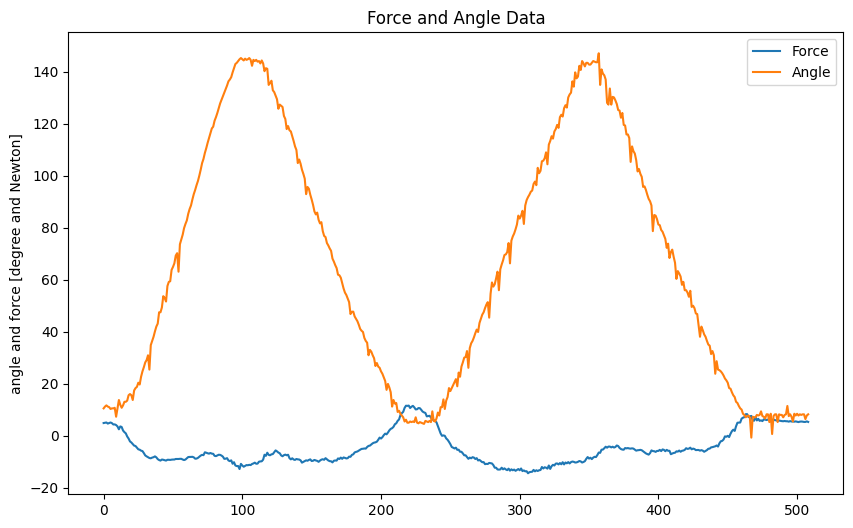

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(force_array, label='Force')
plt.plot(angle_array,label='Angle')
plt.xlabel('')
plt.ylabel('angle and force [degree and Newton]')
plt.title("Force and Angle Data")
plt.legend()
plt.show()

In [102]:
TAU_100= 5 #Nm
L_forearm= (0.146*1.80)# Length of forearm for 1.80m patient
L_hand =(0.108*1.80) # Length of hand for 1.80m patient
bodymass= 80
m_forearm= (0.016*bodymass)# Kg
CoM_forearm_hand= (0.682*(L_forearm+L_hand)) #CoM
hand_w = 0.006 * bodymass #Mass of the patient's hand (kg)
total_hf_w= hand_w+m_forearm #Total mas of the patient's hand and forearm (kg)
distance_sens_force_from_elbow= 0.19

In [103]:
import math 

momento_misurato = abs(distance_sens_force_from_elbow * force_array * np.sin(np.radians(angle_array)))
momento_teorico= total_hf_w* 9.81*CoM_forearm_hand *np.sin(np.radians(angle_array))

Text(0.5, 1.0, 'Comparison between theoretical torque and torque obtained by force sensor measurement')

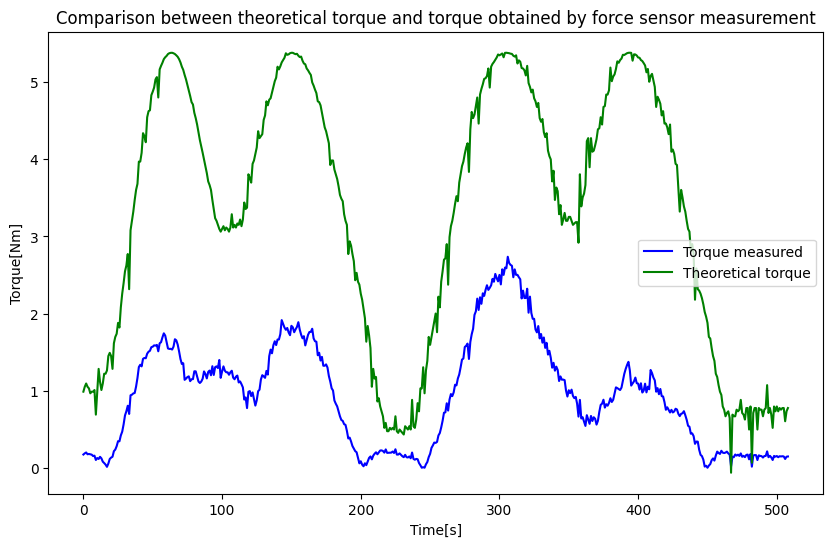

In [104]:
plt.figure(figsize=(10,6))
plt.plot(momento_misurato,color='b',label='Torque measured')
plt.plot(momento_teorico,color='g',  label='Theoretical torque')
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Torque[Nm]')
plt.title("Comparison between theoretical torque and torque obtained by force sensor measurement")

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

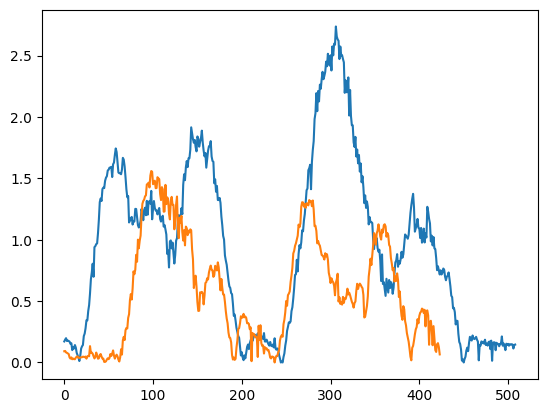

In [105]:
plt.plot(momento_misurato)
plt.plot(momento_misurato_gian)
plt.figure

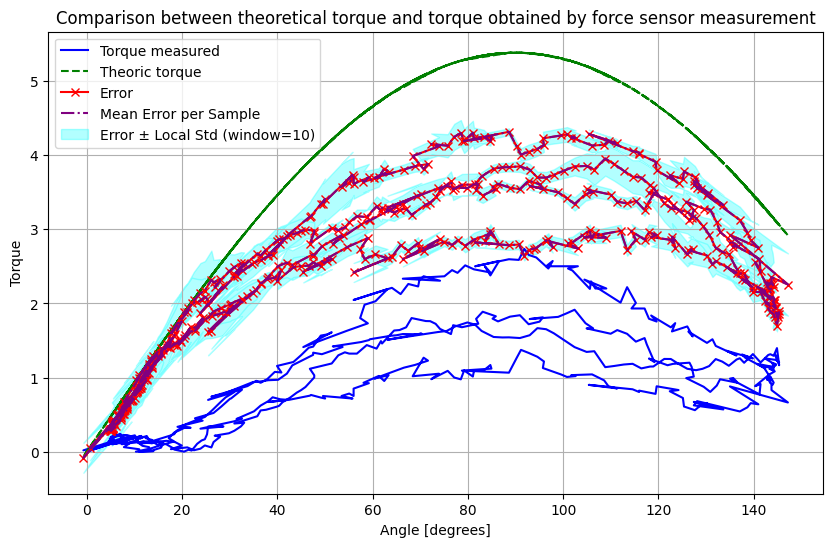

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Calcolo dell'errore per ogni sample
errore = momento_teorico - momento_misurato

# Media dell'errore per ogni valore (senza finestra mobile, calcolo per ogni campione)
mean_error_per_sample = errore

# Definizione della finestra per calcolo della deviazione standard (ad esempio, finestra di 10 campioni)
window_size = 10

# Calcolo della deviazione standard locale
std_local = np.array([
    np.std(errore[i:i + window_size]) for i in range(len(errore) - window_size + 1)
])

# Indici corrispondenti alla finestra mobile
angle_array_valid = angle_array[:len(std_local)]  # Considerare gli angoli validi per la finestra

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Torque misurato e teorico
plt.plot(angle_array, momento_misurato, label='Torque measured', color='b', linestyle='-')
plt.plot(angle_array, momento_teorico, label='Theoric torque', color='g', linestyle='--')

# Errore
plt.plot(angle_array, errore, marker='x', color='r', label='Error')

# Media dell'errore per ogni campione
plt.plot(angle_array, mean_error_per_sample, label='Mean Error per Sample', color='purple', linestyle='-.')

# Area di deviazione standard locale
plt.fill_between(
    angle_array_valid,
    mean_error_per_sample[:len(std_local)] - std_local,
    mean_error_per_sample[:len(std_local)] + std_local,
    color='cyan',
    alpha=0.3,
    label=f'Error ± Local Std (window={window_size})'
)

# Personalizzazione del grafico
plt.legend()
plt.xlabel('Angle [degrees]')
plt.ylabel('Torque')
plt.title("Comparison between theoretical torque and torque obtained by force sensor measurement")
plt.grid(True)
plt.show()


In [107]:
file_path2='/Users/micheletucci'
file_name2='dati_seriale5_michi.txt'
folder_path2=os.path.join(file_path2,file_name2)

try:
    with open(folder_path2, 'r') as file:
        lines_gian = file.readlines()  # Leggi tutte le righe

    # Estrai i valori
    force_values2 = [extract_force(line) for line in lines_gian if extract_force(line) is not None]
    angle_values2 = [extract_angle(line) for line in lines_gian if extract_angle(line) is not None]

    # Converti in array NumPy
    force_array2 = np.array(force_values2)
    angle_array2 = np.array(angle_values2)

    print("Valori di 'forceIs' estratti:")
    print(force_array2)
    print("Valori di 'angle' estratti:")
    print(angle_array2)
except Exception as e:
    print(f"Errore durante la lettura e il parsing del file: {e}")
momento_misurato2 = abs(distance_sens_force_from_elbow * force_array2 * np.sin(np.radians(angle_array2)))
momento_teorico2= total_hf_w* 9.81*CoM_forearm_hand *np.sin(np.radians(angle_array2))

Valori di 'forceIs' estratti:
[  4.19   3.82   4.19   4.03   4.03   4.24   4.14   4.14   3.88   3.88
   3.25   3.2    3.93   3.35   3.98   3.46   4.24   4.19   3.82   3.82
   3.67   3.77   4.09   3.88   3.72   3.04   3.14   2.46   1.89  -0.05
  -0.94  -1.94  -1.89  -3.09  -3.51  -3.77  -4.77  -4.66  -4.4   -4.98
  -5.03  -5.03  -5.4   -5.61  -6.18  -6.18  -7.28  -7.7   -8.01  -8.75
  -8.7   -9.48  -9.85  -9.12  -9.53  -9.32  -8.7   -8.96  -9.48  -8.96
  -9.22  -9.12  -8.59  -7.65  -7.44  -7.54  -7.91  -8.22  -8.17  -8.28
  -8.54  -8.7   -8.54  -8.28  -8.01  -8.17  -8.07  -7.7   -7.54  -7.6
  -7.6   -7.7   -7.54  -8.22  -7.75  -6.97  -7.44  -6.91  -6.5   -6.44
  -6.39  -6.55  -6.34  -6.5   -5.97  -6.08  -5.87  -5.5   -5.71  -6.23
  -6.6   -7.12  -8.33  -9.06  -9.01  -9.85  -9.53  -8.91  -9.32  -8.54
  -8.91  -8.01  -7.96  -7.12  -7.39  -7.39  -7.07  -5.76  -6.34  -6.13
  -5.92  -7.12  -6.76  -6.65  -6.86  -7.07  -6.81  -6.97  -6.86  -6.6
  -6.5   -6.23  -6.08  -5.81  -5.55  -5.45  -5.5 

Text(0, 0.5, 'Torque')

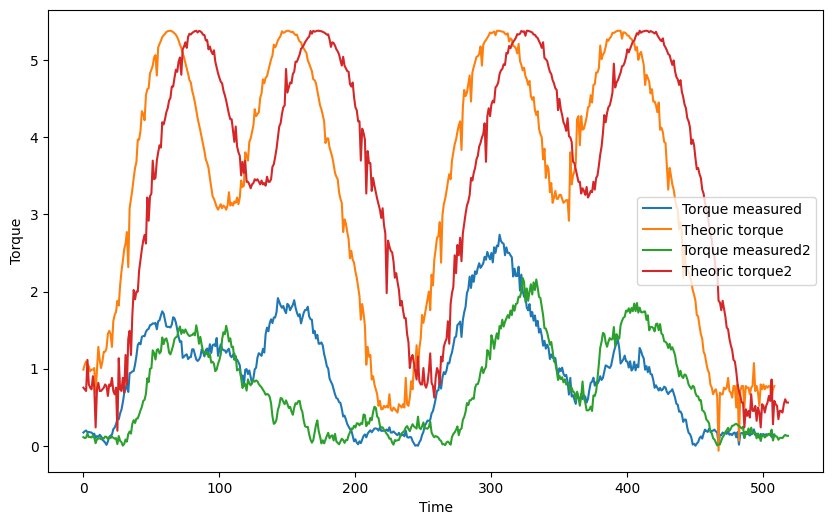

In [108]:
t_misurato = np.arange(len(momento_misurato))
t_teorico = np.arange(len(momento_teorico))
t_misurato2 = np.arange(len(momento_misurato2))
t_teorico2 = np.arange(len(momento_teorico2))


plt.figure(figsize=(10, 6))
plt.plot(t_misurato, momento_misurato, label='Torque measured')
plt.plot(t_teorico, momento_teorico, label='Theoric torque')
plt.plot(t_misurato2, momento_misurato2, label='Torque measured2')
plt.plot(t_teorico2, momento_teorico2, label='Theoric torque2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Torque')
# plt.title("Confronto tra momento teorico e momento misurato al variare dell'angolo")

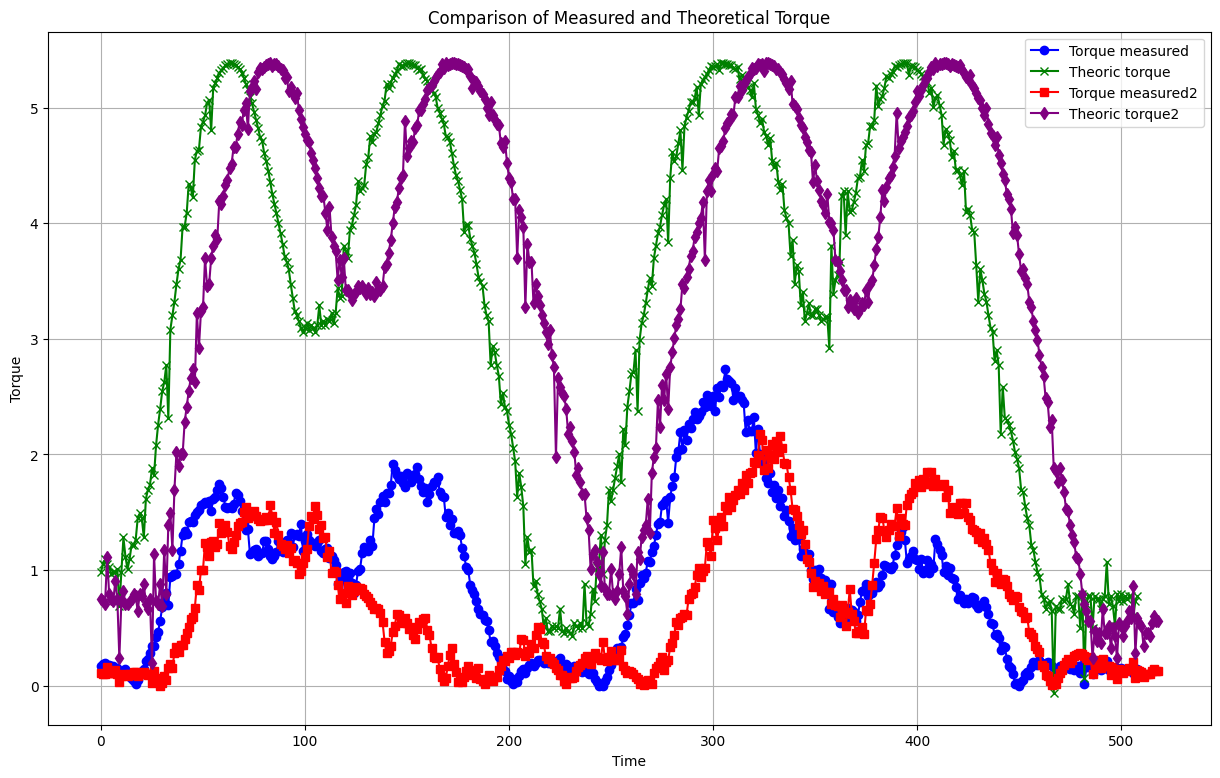

In [109]:
plt.figure(figsize=(15, 9))

plt.plot(t_misurato, momento_misurato, label='Torque measured', color='blue', marker='o')
plt.plot(t_teorico, momento_teorico, label='Theoric torque', color='green', marker='x')
plt.plot(t_misurato2, momento_misurato2, label='Torque measured2', color='red', marker='s')
plt.plot(t_teorico2, momento_teorico2, label='Theoric torque2', color='purple', marker='d')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Torque')
plt.title('Comparison of Measured and Theoretical Torque')
plt.grid(True)
plt.show()


In [110]:
import statistics
statistics.mean(errore)

2.38166368501174

In [111]:
max(errore)# ERRORE MASSIMO ACQUISIZIONE MICHI

4.316441326781948

ACQUISIZIONI GIAN


In [112]:
file_path_gian='/Users/micheletucci'
file_name_gian='dati_seriale3.txt'

folder_path_gian=os.path.join(file_path_gian,file_name_gian)

#dati=np.loadtxt(folder_path)

# Funzioni per estrarre valori
def extract_force(line):
    if 'forceIs' in line:
        try:
            return float(line.split(':')[1].strip())
        except ValueError:
            pass
    return None

def extract_angle(line):
    if 'Angle' in line:
        try:
            return float(line.split(':')[1].strip())
        except ValueError:
            pass
    return None

# Lettura e parsing del file
try:
    with open(folder_path_gian, 'r') as file:
        lines_new = file.readlines()  # Leggi tutte le righe

    # Estrai i valori
    force_values_gian1 = [extract_force(line) for line in lines_new if extract_force(line) is not None]
    angle_values_gian1 = [extract_angle(line) for line in lines_new if extract_angle(line) is not None]

    # Converti in array NumPy
    force_array_gian1 = np.array(force_values_gian1)
    angle_array_gian1 = np.array(angle_values_gian1)

    print("Valori di 'forceIs' estratti:")
    print(force_array_gian1)
    print("Valori di 'angle' estratti:")
    print(angle_array_gian1)
except Exception as e:
    print(f"Errore durante la lettura e il parsing del file: {e}")


Valori di 'forceIs' estratti:
[ 1.99  1.89  1.73  1.68  1.52  1.47  1.41  0.94  0.84  0.58  0.68  0.58
  0.58  0.84  1.    0.94  0.84  1.    0.89  0.89  0.94  1.    1.05  1.
  1.05  0.94  1.1   1.15  1.1   2.99  1.57  1.73  1.57  1.1   0.73  1.
  1.73  1.31  1.26  0.73  1.31  1.52  1.31  0.79  0.68 -0.1  -0.1   0.21
  0.52  0.73  0.58  0.79  1.15  1.1   1.57  2.04  1.15  0.68  1.1   1.26
  1.05  0.47 -0.21 -0.89 -1.68 -1.78 -2.72 -2.99 -2.78 -3.3  -3.41 -3.2
 -3.98 -4.19 -5.13 -5.34 -4.77 -5.13 -5.81 -6.13 -6.13 -6.5  -6.6  -7.33
 -6.71 -6.86 -7.07 -7.81 -8.43 -8.49 -8.33 -8.33 -8.22 -8.59 -8.49 -8.43
 -8.22 -8.49 -8.59 -8.49 -7.86 -7.91 -7.91 -7.54 -7.54 -7.96 -7.91 -7.86
 -7.23 -6.97 -7.54 -7.44 -6.5  -6.55 -7.75 -6.97 -7.28 -7.23 -6.65 -6.39
 -7.23 -7.49 -7.18 -7.44 -6.13 -6.65 -7.07 -7.7  -6.34 -5.87 -6.81 -6.55
 -6.91 -6.13 -5.87 -6.18 -5.55 -6.18 -6.29 -5.97 -6.18 -6.08 -6.23 -6.18
 -5.29 -4.82 -3.46 -3.88 -4.09 -3.46 -2.72 -2.3  -2.3  -3.09 -3.04 -3.09
 -2.99 -2.51 -2.88 -3.41 -

Text(0.5, 1.0, 'Comparison between theoretical torque and torque obtained by force sensor measurement')

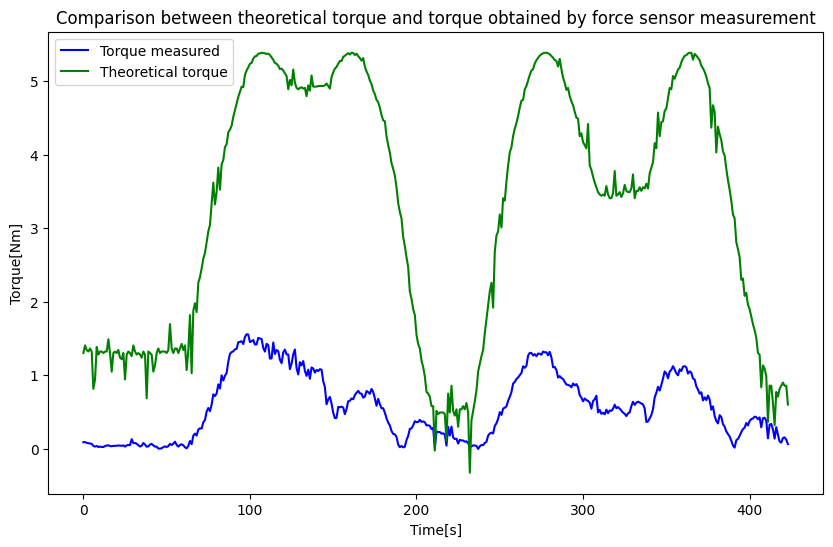

In [113]:
TAU_100= 5 #Nm
L_forearm_gian= (0.146*1.73)# Length of forearm for 1.80m patient
L_hand_gian =(0.108*1.73) # Length of hand for 1.80m patient
bodymass_gian= 68
m_forearm_gian= (0.016*bodymass)# Kg
CoM_forearm_hand_gian= (0.682*(L_forearm+L_hand)) #CoM
hand_w_gian = 0.006 * bodymass #Mass of the patient's hand (kg)
total_hf_w_gian= hand_w+m_forearm #Total mas of the patient's hand and forearm (kg)
distance_sens_force_from_elbow_gian= 0.19


momento_misurato_gian = abs(distance_sens_force_from_elbow_gian * force_array_gian1 * np.sin(np.radians(angle_array_gian1)))
momento_teorico_gian= total_hf_w_gian* 9.81*CoM_forearm_hand_gian *np.sin(np.radians(angle_array_gian1))

plt.figure(figsize=(10,6))
plt.plot(momento_misurato_gian,color='b',label='Torque measured')
plt.plot(momento_teorico_gian,color='g',  label='Theoretical torque')
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Torque[Nm]')
plt.title("Comparison between theoretical torque and torque obtained by force sensor measurement")

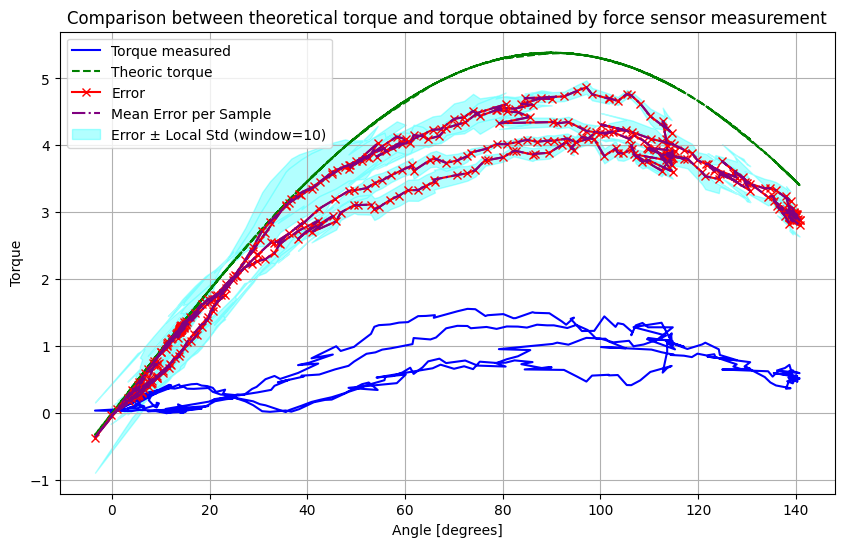

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Calcolo dell'errore per ogni sample
errore_gian = momento_teorico_gian - momento_misurato_gian

# Media dell'errore per ogni valore (senza finestra mobile, calcolo per ogni campione)
mean_error_per_sample_gian = errore_gian

# Definizione della finestra per calcolo della deviazione standard (ad esempio, finestra di 10 campioni)
window_size = 10

# Calcolo della deviazione standard locale
std_local2 = np.array([
    np.std(errore_gian[i:i + window_size]) for i in range(len(errore_gian) - window_size + 1)
])

# Indici corrispondenti alla finestra mobile
angle_array_valid_gian = angle_array_gian1[:len(std_local2)]  # Considerare gli angoli validi per la finestra

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Torque misurato e teorico
plt.plot(angle_array_gian1, momento_misurato_gian, label='Torque measured', color='b', linestyle='-')
plt.plot(angle_array_gian1, momento_teorico_gian, label='Theoric torque', color='g', linestyle='--')

# Errore
plt.plot(angle_array_gian1, errore_gian, marker='x', color='r', label='Error')

# Media dell'errore per ogni campione
plt.plot(angle_array_gian1, mean_error_per_sample_gian, label='Mean Error per Sample', color='purple', linestyle='-.')

# Area di deviazione standard locale
plt.fill_between(
    angle_array_valid_gian,
    mean_error_per_sample_gian[:len(std_local2)] - std_local2,
    mean_error_per_sample_gian[:len(std_local2)] + std_local2,
    color='cyan',
    alpha=0.3,
    label=f'Error ± Local Std (window={window_size})'
)

# Personalizzazione del grafico
plt.legend()
plt.xlabel('Angle [degrees]')
plt.ylabel('Torque')
plt.title("Comparison between theoretical torque and torque obtained by force sensor measurement")
plt.grid(True)
plt.show()


In [115]:
max(errore_gian)

4.868856814413047

In [116]:
print(max(momento_misurato))
print(max(momento_misurato_gian))

2.736488305760575
1.558941251892983


In [117]:
offset=np.mean(momento_teorico_gian[0:20]-momento_misurato_gian[0:20])
offset

1.2278217065109331

26.211380142284813
13.22628940808927


/var/folders/n6/52czs5jx0tn7p1cgl2fptt_r0000gn/T/ipykernel_81074/300018751.py:1: RuntimeWarning: divide by zero encountered in divide
  gain_gian=momento_teorico_gian/momento_misurato_gian


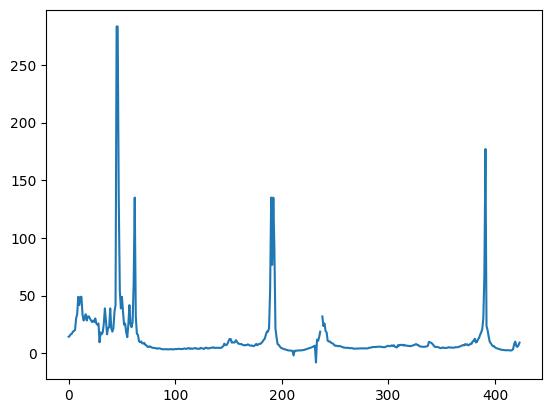

In [118]:

gain_gian=momento_teorico_gian/momento_misurato_gian
gain_gian[np.isinf(gain_gian)]=np.nan
gain_gian

mean_gain_gian=np.nanmean(gain_gian)
mean_gain_gian
std_gian=np.nanstd(gain_gian)
print(std_gian)
print(mean_gain_gian)
gain_gian

plt.plot(gain_gian)

In [119]:
file_path_angle='/Users/micheletucci/Downloads'
file_name_angle='calib_angle.txt'
folder_path_angle=os.path.join(file_path_angle,file_name_angle)

file_path_force='/Users/micheletucci/Downloads'
file_name_force='calib_force.txt'
folder_path_force=os.path.join(file_path_force,file_name_force)

# Funzioni per estrarre valori
def extract_force_new(line):
    if 'force' in line:
        try:
            return float(line.split(':')[1].strip())
        except ValueError:
            pass
    return None

def extract_angle_new(line):
    if 'Position' in line:
        try:
            return float(line.split(':')[1].strip())
        except ValueError:
            pass
    return None

# Lettura e parsing del file
try:
    with open(folder_path_force, 'r') as file:
        lines_force = file.readlines()  # Leggi tutte le righe

    with open(folder_path_angle, 'r') as file:
        lines_angle = file.readlines()  # Leggi tutte le righe
        

    # Estrai i valori
    force_values_new = [extract_force_new(line) for line in lines_force if extract_force_new(line) is not None]
    angle_values_new = [extract_angle_new(line) for line in lines_angle if extract_angle_new(line) is not None]

    # Converti in array NumPy
    force_array_new = np.array(force_values_new)
    angle_array_new = np.array(angle_values_new)

    print("Valori di 'force' estratti:")
    print(force_array_new)
    print("Valori di 'angle' estratti:")
    print(angle_array_new)
except Exception as e:
    print(f"Errore durante la lettura e il parsing del file: {e}")




Valori di 'force' estratti:
[ -95.  -95.  -96.  -96.  -95.  -95.  -95.  -96.  -96.  -96.  -96.  -95.
  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -95.  -97.  -96.
  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -97.  -96.  -96.
  -97.  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -96.  -97.  -96.  -96.
  -96.  -96.  -96.  -96.  -95.  -95.  -96.  -96.  -97.  -96.  -96.  -97.
  -97.  -98.  -97.  -97.  -97. -146. -166. -145. -143. -148. -147. -147.
 -146. -146. -149. -149. -147. -146. -148. -146. -147. -147. -147. -147.
 -147. -147. -148. -148. -147. -146. -147. -147. -148. -147. -146. -147.
 -147. -148. -148. -147. -146. -146. -147. -148. -149. -147. -147. -148.
 -148. -147. -148. -147. -146. -146. -146. -149. -149. -147. -148. -148.
 -147. -147. -146. -146. -148. -148. -149. -147. -146. -147. -148. -147.
 -146. -147. -147. -148.]
Valori di 'angle' estratti:
[960. 959. 977. 960. 958. 957. 960. 965. 971. 964. 958. 958. 959. 985.
 963. 981. 959. 955. 963. 965. 955. 954. 959

Text(0.5, 1.0, 'Angle calibration')

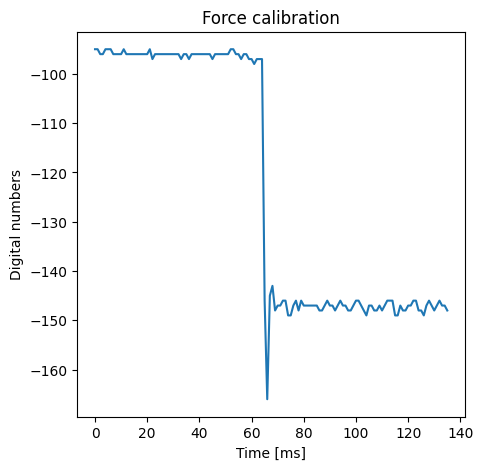

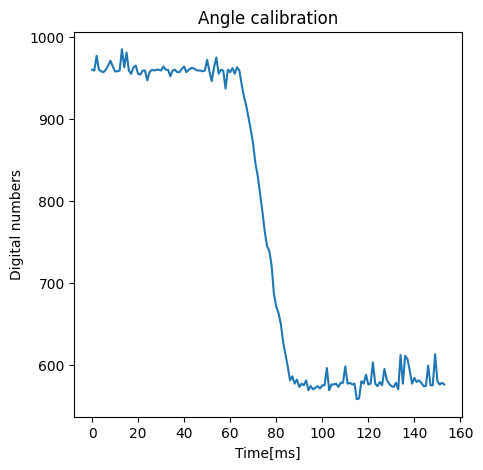

In [120]:
plt.figure(figsize=(5,5))
plt.plot(force_array_new)
plt.xlabel('Time [ms]')
plt.ylabel('Digital numbers')
plt.title('Force calibration')
plt.show

plt.figure(figsize=(5,5))
plt.plot(angle_array_new)
plt.xlabel('Time[ms]')
plt.ylabel('Digital numbers')
plt.title('Angle calibration')